In [1]:
# setup
import os
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu định dạng json

In [11]:
def read_jsonl_file_with_pandas(file_path):
    """
    Đọc file dữ liệu NER từ định dạng JSON Lines (.jsonl hoặc .json) bằng pandas.

    Args:
        file_path (str): Đường dẫn đến file dữ liệu.

    Returns:
        list: Một list các câu, trong đó mỗi câu là một list các tuple (word, tag).
    """
    sentences = []
    if not os.path.exists(file_path):
        print(f"CẢNH BÁO: File không tồn tại tại '{file_path}'.")
        print("=> Vui lòng kiểm tra xem bạn đã khởi động Jupyter từ thư mục gốc của dự án chưa.")
        return sentences

    try:
        # Sử dụng pandas để đọc file JSON Lines
        df = pd.read_json(file_path, lines=True, encoding='utf-8')

        # Chuyển đổi từng dòng của DataFrame thành định dạng câu mong muốn
        for index, row in df.iterrows():
            sentence = list(zip(row['words'], row['tags']))
            sentences.append(sentence)
            
    except Exception as e:
        print(f"Đã xảy ra lỗi khi đọc file '{file_path}': {e}")
        print("Vui lòng kiểm tra lại định dạng file. Mỗi dòng phải là một JSON object hợp lệ.")

    return sentences

# Đường dẫn đến thư mục dữ liệu
data_dir = os.path.join('..', 'data', 'raw', 'PhoNER_COVID19')
train_path = os.path.join(data_dir, 'train_word.json')
dev_path = os.path.join(data_dir, 'dev_word.json')
test_path = os.path.join(data_dir, 'test_word.json')

# Tải dữ liệu 
train_sentences = read_jsonl_file_with_pandas(train_path)
dev_sentences = read_jsonl_file_with_pandas(dev_path)
test_sentences = read_jsonl_file_with_pandas(test_path)


# In ra một câu mẫu nếu dữ liệu tồn tại
if train_sentences:
    print("\nVí dụ một câu từ tập train:")
    print(train_sentences[0])


Ví dụ một câu từ tập train:
[('Đồng_thời', 'O'), (',', 'O'), ('bệnh_viện', 'O'), ('tiếp_tục', 'O'), ('thực_hiện', 'O'), ('các', 'O'), ('biện_pháp', 'O'), ('phòng_chống', 'O'), ('dịch_bệnh', 'O'), ('COVID', 'O'), ('-', 'O'), ('19', 'O'), ('theo', 'O'), ('hướng_dẫn', 'O'), ('của', 'O'), ('Bộ', 'B-ORGANIZATION'), ('Y_tế', 'I-ORGANIZATION'), ('.', 'O')]


# Phân bố các nhãn

Thống kê số lượng các nhãn:
                        Count
O                      104750
B-LOCATION               5398
I-LOCATION               5242
B-PATIENT_ID             3240
B-DATE                   2549
I-ORGANIZATION           2545
I-DATE                   2500
I-SYMPTOM_AND_DISEASE    1552
B-SYMPTOM_AND_DISEASE    1439
B-ORGANIZATION           1137
B-AGE                     682
B-GENDER                  542
B-NAME                    349
B-TRANSPORTATION          226
B-JOB                     205
I-TRANSPORTATION           67
I-JOB                      62
I-NAME                     13
I-PATIENT_ID               11
I-AGE                       2


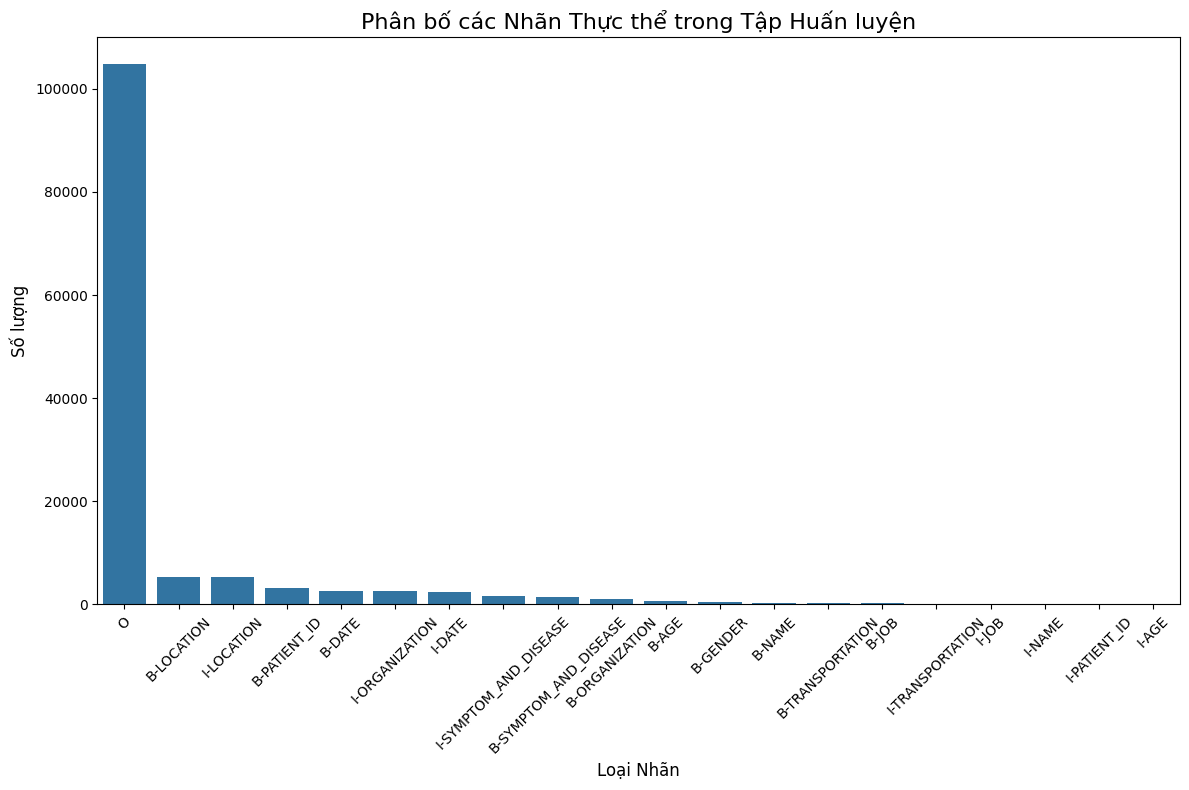

In [12]:
all_tags = [tag for sentence in train_sentences for word, tag in sentence]
tag_counts = Counter(all_tags)
df_tags = pd.DataFrame.from_dict(tag_counts, orient='index', columns=['Count'])
df_tags = df_tags.sort_values(by='Count', ascending=False)

print("Thống kê số lượng các nhãn:")
print(df_tags)

plt.figure(figsize=(12, 8))
sns.barplot(x=df_tags.index, y=df_tags['Count'])
plt.title('Phân bố các Nhãn Thực thể trong Tập Huấn luyện', fontsize=16)
plt.xlabel('Loại Nhãn', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Phân bố độ dài câu 

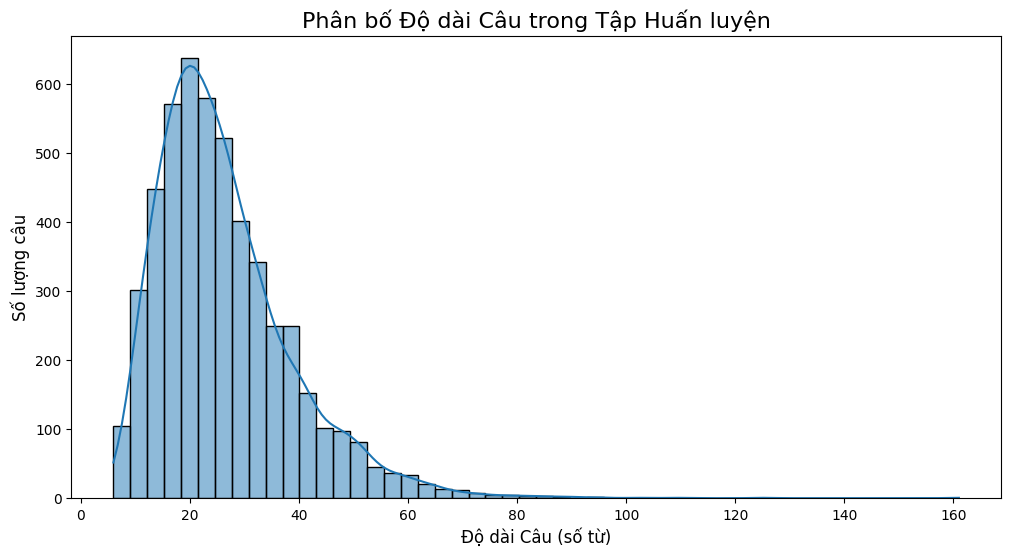


Thống kê về độ dài câu:
count    5027.000000
mean       26.359857
std        12.504579
min         6.000000
25%        18.000000
50%        24.000000
75%        32.000000
95%        50.000000
99%        65.000000
max       161.000000
dtype: float64

=> Gợi ý: Khoảng 95% các câu có độ dài nhỏ hơn hoặc bằng 50 từ.
   Chúng ta có thể cân nhắc chọn `max_sequence_length` là một số tròn gần đó, ví dụ: 128 hoặc 256.


In [ ]:
sentence_lengths = [len(sentence) for sentence in train_sentences]

plt.figure(figsize=(12, 6))
sns.histplot(sentence_lengths, bins=50, kde=True)
plt.title('Phân bố Độ dài Câu trong Tập Huấn luyện', fontsize=16)
plt.xlabel('Độ dài Câu (số từ)', fontsize=12)
plt.ylabel('Số lượng câu', fontsize=12)
plt.show()

df_lengths = pd.Series(sentence_lengths)
print("\nThống kê về độ dài câu:")
print(df_lengths.describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99]))

suggested_max_len = int(df_lengths.quantile(0.95))
print(f"\n=> Gợi ý: Khoảng 95% các câu có độ dài nhỏ hơn hoặc bằng {suggested_max_len} từ.")
print(f"   Chúng ta có thể cân nhắc chọn `max_length` là một số tròn gần đó, ví dụ: 128 hoặc 256.")